In [1]:
import os
import torch
import nibabel as nib
from torch.utils.data import Dataset
import matplotlib.pyplot as plt
from scipy.ndimage import zoom
import SimpleITK as sitk
from SimpleITK import GetImageFromArray
import numpy as np
from scipy.ndimage import zoom
from monai.metrics import DiceMetric
import monai

from monai.transforms import (
    Activations,
    AddChannel,
    AsDiscrete,
    Compose,
    LoadImage,
    RandRotate90,
    RandSpatialCrop,
    ScaleIntensity,
    EnsureType,
    MapTransform,
    HistogramNormalize,
    AdjustContrast,
    EnsureChannelFirst,
    CastToType,
)



# Preprocessing

In [50]:
# Define path to NIfTI files
path = 'ADAM_features/Baseline_Subjects'

# Initialize variables to store min and max dimensions
min_width, min_height, min_depth = float('inf'), float('inf'), float('inf')
max_width, max_height, max_depth = float('-inf'), float('-inf'), float('-inf')

# Loop over all NIfTI files in the directory
for filename in os.listdir(path):
    if filename.endswith('.nii.gz'):
        file_path = os.path.join(path, filename)
        img = nib.load(file_path)
        data = img.get_fdata()
        print(f"File: {filename}, Shape: {data.shape}")

        width, height, depth = data.shape
        min_width, max_width = min(min_width, width), max(max_width, width)
        min_height, max_height = min(
            min_height, height), max(max_height, height)
        min_depth, max_depth = min(min_depth, depth), max(max_depth, depth)

print("\nDimension statistics:")
print(f"Min Width: {min_width}, Max Width: {max_width}")
print(f"Min Height: {min_height}, Max Height: {max_height}")
print(f"Min Depth: {min_depth}, Max Depth: {max_depth}")


File: TOF_10044B.nii.gz, Shape: (512, 512, 100)
File: TOF_10046B.nii.gz, Shape: (512, 512, 140)
File: TOF_10060B.nii.gz, Shape: (1024, 1024, 160)
File: TOF_10047B.nii.gz, Shape: (512, 512, 138)
File: TOF_10056B.nii.gz, Shape: (256, 256, 100)
File: TOF_10062B.nii.gz, Shape: (512, 512, 138)


KeyboardInterrupt: 

In [5]:
# Define path to NIfTI files
path = 'ADAM_features/Followup_Subjects'

# Initialize variables to store min and max dimensions
min_width, min_height, min_depth = float('inf'), float('inf'), float('inf')
max_width, max_height, max_depth = float('-inf'), float('-inf'), float('-inf')

# Loop over all NIfTI files in the directory
for filename in os.listdir(path):
    if filename.endswith('.nii.gz'):
        file_path = os.path.join(path, filename)
        img = nib.load(file_path)
        data = img.get_fdata()
        print(f"File: {filename}, Shape: {data.shape}")

        width, height, depth = data.shape
        min_width, max_width = min(min_width, width), max(max_width, width)
        min_height, max_height = min(
            min_height, height), max(max_height, height)
        min_depth, max_depth = min(min_depth, depth), max(max_depth, depth)

print("\nDimension statistics:")
print(f"Min Width: {min_width}, Max Width: {max_width}")
print(f"Min Height: {min_height}, Max Height: {max_height}")
print(f"Min Depth: {min_depth}, Max Depth: {max_depth}")


File: TOF_10047F.nii.gz, Shape: (512, 512, 98)
File: TOF_10054F.nii.gz, Shape: (512, 512, 140)
File: TOF_10053F.nii.gz, Shape: (560, 560, 140)
File: TOF_10065F.nii.gz, Shape: (512, 512, 65)
File: TOF_10070F.nii.gz, Shape: (560, 560, 140)
File: TOF_10069F.nii.gz, Shape: (560, 560, 140)
File: TOF_10049F.nii.gz, Shape: (560, 560, 140)
File: TOF_10050F.nii.gz, Shape: (512, 512, 138)
File: TOF_10048F.nii.gz, Shape: (560, 560, 150)
File: TOF_10063F.nii.gz, Shape: (560, 560, 140)
File: TOF_10051F.nii.gz, Shape: (560, 560, 140)
File: TOF_10074F.nii.gz, Shape: (560, 560, 140)
File: TOF_10066F.nii.gz, Shape: (512, 512, 138)
File: TOF_10064F.nii.gz, Shape: (560, 560, 140)
File: TOF_10056F.nii.gz, Shape: (560, 560, 140)
File: TOF_10071F.nii.gz, Shape: (560, 560, 140)
File: TOF_10055F.nii.gz, Shape: (512, 512, 140)
File: TOF_10045F.nii.gz, Shape: (512, 512, 140)
File: TOF_10073F.nii.gz, Shape: (512, 512, 140)
File: TOF_10068F.nii.gz, Shape: (1024, 1024, 160)
File: TOF_10046F.nii.gz, Shape: (560, 56

In [2]:
# Define path to NIfTI files
path = 'ADAM_features/Unique_Subjects'

# Initialize variables to store min and max dimensions
min_width, min_height, min_depth = float('inf'), float('inf'), float('inf')
max_width, max_height, max_depth = float('-inf'), float('-inf'), float('-inf')

# Loop over all NIfTI files in the directory
for filename in os.listdir(path):
    if filename.endswith('.nii.gz'):
        file_path = os.path.join(path, filename)
        img = nib.load(file_path)
        data = img.get_fdata()
        print(f"File: {filename}, Shape: {data.shape}")

        width, height, depth = data.shape
        min_width, max_width = min(min_width, width), max(max_width, width)
        min_height, max_height = min(
            min_height, height), max(max_height, height)
        min_depth, max_depth = min(min_depth, depth), max(max_depth, depth)

print("\nDimension statistics:")
print(f"Min Width: {min_width}, Max Width: {max_width}")
print(f"Min Height: {min_height}, Max Height: {max_height}")
print(f"Min Depth: {min_depth}, Max Depth: {max_depth}")


File: TOF_10036.nii.gz, Shape: (560, 560, 140)


KeyboardInterrupt: 

In [16]:
# Define path to NIfTI files
path = 'ADAM_labels/Unique_Subjects'

# Initialize variables to store min and max dimensions
min_width, min_height, min_depth = float('inf'), float('inf'), float('inf')
max_width, max_height, max_depth = float('-inf'), float('-inf'), float('-inf')

# Loop over all NIfTI files in the directory
for filename in os.listdir(path):
    if filename.endswith('.nii.gz'):
        file_path = os.path.join(path, filename)
        img = nib.load(file_path)
        data = img.get_fdata()
        print(np.unique(data))
        print(f"File: {filename}, Shape: {data.shape}")

        width, height, depth = data.shape
        min_width, max_width = min(min_width, width), max(max_width, width)
        min_height, max_height = min(
            min_height, height), max(max_height, height)
        min_depth, max_depth = min(min_depth, depth), max(max_depth, depth)

print("\nDimension statistics:")
print(f"Min Width: {min_width}, Max Width: {max_width}")
print(f"Min Height: {min_height}, Max Height: {max_height}")
print(f"Min Depth: {min_depth}, Max Depth: {max_depth}")


[0. 1.]
File: aneurysms_10028.nii.gz, Shape: (560, 560, 140)
[0. 1.]
File: aneurysms_10038.nii.gz, Shape: (560, 560, 140)
[0. 1.]
File: aneurysms_10040.nii.gz, Shape: (560, 560, 140)
[0. 1.]
File: aneurysms_10026.nii.gz, Shape: (1024, 1024, 160)
[0. 1.]
File: aneurysms_10024.nii.gz, Shape: (560, 560, 140)
[0. 1. 2.]
File: aneurysms_10027.nii.gz, Shape: (560, 560, 140)
[0. 1.]
File: aneurysms_10037.nii.gz, Shape: (256, 256, 100)
[0. 1.]
File: aneurysms_10023.nii.gz, Shape: (528, 528, 120)
[0. 1.]
File: aneurysms_10039.nii.gz, Shape: (512, 512, 140)
[0. 1.]
File: aneurysms_10031.nii.gz, Shape: (512, 512, 98)
[0. 1.]
File: aneurysms_10030.nii.gz, Shape: (512, 512, 100)
[0. 1.]
File: aneurysms_10021.nii.gz, Shape: (560, 560, 140)
[0. 1.]
File: aneurysms_10032.nii.gz, Shape: (512, 512, 140)
[0. 1.]
File: aneurysms_10033.nii.gz, Shape: (560, 560, 140)
[0. 1.]
File: aneurysms_10043.nii.gz, Shape: (560, 560, 140)
[0. 1.]
File: aneurysms_10034.nii.gz, Shape: (560, 560, 140)
[0. 1.]
File: aneury

# Fix Labels, non-zeros --> 1, zeros --> 0

In [2]:
import os
import numpy as np
import nibabel as nib

# Define path to NIfTI files
input_path = 'ADAM_labels/Unique_Subjects'
output_path = 'ADAM_labels_fixed/Unique_Subjects'

# Create the output directory if it does not exist
if not os.path.exists(output_path):
    os.makedirs(output_path)

# Loop over all NIfTI files in the directory
for filename in os.listdir(input_path):
    if filename.endswith('.nii.gz'):
        input_file_path = os.path.join(input_path, filename)
        img = nib.load(input_file_path)
        data = img.get_fdata()

        # Map all non-zero values to 1 and zero values to 0
        data[data != 0] = 1

        # Log the unique values after mapping
        print(np.unique(data))
        print(f"Processed File: {filename}, Shape: {data.shape}")

        # Create a new NIfTI image object with updated data
        new_img = nib.Nifti1Image(data, img.affine, img.header)

        # Save the new NIfTI file to the output folder
        output_file_path = os.path.join(output_path, filename)
        nib.save(new_img, output_file_path)
        print(f"Saved to {output_file_path}")


[0. 1.]
Processed File: aneurysms_10028.nii.gz, Shape: (560, 560, 140)
Saved to ADAM_labels_fixed/Unique_Subjects/aneurysms_10028.nii.gz
[0. 1.]
Processed File: aneurysms_10038.nii.gz, Shape: (560, 560, 140)
Saved to ADAM_labels_fixed/Unique_Subjects/aneurysms_10038.nii.gz
[0. 1.]
Processed File: aneurysms_10040.nii.gz, Shape: (560, 560, 140)
Saved to ADAM_labels_fixed/Unique_Subjects/aneurysms_10040.nii.gz
[0. 1.]
Processed File: aneurysms_10026.nii.gz, Shape: (1024, 1024, 160)
Saved to ADAM_labels_fixed/Unique_Subjects/aneurysms_10026.nii.gz
[0. 1.]
Processed File: aneurysms_10024.nii.gz, Shape: (560, 560, 140)
Saved to ADAM_labels_fixed/Unique_Subjects/aneurysms_10024.nii.gz
[0. 1.]
Processed File: aneurysms_10027.nii.gz, Shape: (560, 560, 140)
Saved to ADAM_labels_fixed/Unique_Subjects/aneurysms_10027.nii.gz
[0. 1.]
Processed File: aneurysms_10037.nii.gz, Shape: (256, 256, 100)
Saved to ADAM_labels_fixed/Unique_Subjects/aneurysms_10037.nii.gz
[0. 1.]
Processed File: aneurysms_10023

In [3]:
import os
import numpy as np
import nibabel as nib

# Define path to NIfTI files
input_path = 'ADAM_labels/Baseline_Subjects'
output_path = 'ADAM_labels_fixed/Baseline_Subjects'

# Create the output directory if it does not exist
if not os.path.exists(output_path):
    os.makedirs(output_path)

# Loop over all NIfTI files in the directory
for filename in os.listdir(input_path):
    if filename.endswith('.nii.gz'):
        input_file_path = os.path.join(input_path, filename)
        img = nib.load(input_file_path)
        data = img.get_fdata()

        # Map all non-zero values to 1 and zero values to 0
        data[data != 0] = 1

        # Log the unique values after mapping
        print(np.unique(data))
        print(f"Processed File: {filename}, Shape: {data.shape}")

        # Create a new NIfTI image object with updated data
        new_img = nib.Nifti1Image(data, img.affine, img.header)

        # Save the new NIfTI file to the output folder
        output_file_path = os.path.join(output_path, filename)
        nib.save(new_img, output_file_path)
        print(f"Saved to {output_file_path}")


[0. 1.]
Processed File: aneurysms_10071B.nii.gz, Shape: (256, 256, 100)
Saved to ADAM_labels_fixed/Baseline_Subjects/aneurysms_10071B.nii.gz
[0. 1.]
Processed File: aneurysms_10058B.nii.gz, Shape: (512, 512, 100)
Saved to ADAM_labels_fixed/Baseline_Subjects/aneurysms_10058B.nii.gz
[0. 1.]
Processed File: aneurysms_10052B.nii.gz, Shape: (512, 512, 140)
Saved to ADAM_labels_fixed/Baseline_Subjects/aneurysms_10052B.nii.gz
[0. 1.]
Processed File: aneurysms_10062B.nii.gz, Shape: (512, 512, 138)
Saved to ADAM_labels_fixed/Baseline_Subjects/aneurysms_10062B.nii.gz
[0. 1.]
Processed File: aneurysms_10072B.nii.gz, Shape: (1024, 1024, 160)
Saved to ADAM_labels_fixed/Baseline_Subjects/aneurysms_10072B.nii.gz
[0. 1.]
Processed File: aneurysms_10059B.nii.gz, Shape: (256, 256, 100)
Saved to ADAM_labels_fixed/Baseline_Subjects/aneurysms_10059B.nii.gz
[0. 1.]
Processed File: aneurysms_10060B.nii.gz, Shape: (1024, 1024, 160)
Saved to ADAM_labels_fixed/Baseline_Subjects/aneurysms_10060B.nii.gz
[0. 1.]
P

In [4]:
import os
import numpy as np
import nibabel as nib

# Define path to NIfTI files
input_path = 'ADAM_labels/Followup_Subjects'
output_path = 'ADAM_labels_fixed/Followup_Subjects'

# Create the output directory if it does not exist
if not os.path.exists(output_path):
    os.makedirs(output_path)

# Loop over all NIfTI files in the directory
for filename in os.listdir(input_path):
    if filename.endswith('.nii.gz'):
        input_file_path = os.path.join(input_path, filename)
        img = nib.load(input_file_path)
        data = img.get_fdata()

        # Map all non-zero values to 1 and zero values to 0
        data[data != 0] = 1

        # Log the unique values after mapping
        print(np.unique(data))
        print(f"Processed File: {filename}, Shape: {data.shape}")

        # Create a new NIfTI image object with updated data
        new_img = nib.Nifti1Image(data, img.affine, img.header)

        # Save the new NIfTI file to the output folder
        output_file_path = os.path.join(output_path, filename)
        nib.save(new_img, output_file_path)
        print(f"Saved to {output_file_path}")


[0. 1.]
Processed File: aneurysms_10049F.nii.gz, Shape: (560, 560, 140)
Saved to ADAM_labels_fixed/Followup_Subjects/aneurysms_10049F.nii.gz
[0. 1.]
Processed File: aneurysms_10054F.nii.gz, Shape: (512, 512, 140)
Saved to ADAM_labels_fixed/Followup_Subjects/aneurysms_10054F.nii.gz
[0. 1.]
Processed File: aneurysms_10050F.nii.gz, Shape: (512, 512, 138)
Saved to ADAM_labels_fixed/Followup_Subjects/aneurysms_10050F.nii.gz
[0. 1.]
Processed File: aneurysms_10063F.nii.gz, Shape: (560, 560, 140)
Saved to ADAM_labels_fixed/Followup_Subjects/aneurysms_10063F.nii.gz
[0. 1.]
Processed File: aneurysms_10078F.nii.gz, Shape: (560, 560, 140)
Saved to ADAM_labels_fixed/Followup_Subjects/aneurysms_10078F.nii.gz
[0. 1.]
Processed File: aneurysms_10077F.nii.gz, Shape: (560, 560, 140)
Saved to ADAM_labels_fixed/Followup_Subjects/aneurysms_10077F.nii.gz
[0. 1.]
Processed File: aneurysms_10067F.nii.gz, Shape: (560, 560, 140)
Saved to ADAM_labels_fixed/Followup_Subjects/aneurysms_10067F.nii.gz
[0. 1.]
Proce

# Dataset

In [3]:



class CustomADAMDataset(Dataset):
    def __init__(self, feature_folder, label_folder, desired_shape=(128, 128, 64)):
        self.feature_files = sorted(
            [os.path.join(feature_folder, f) for f in os.listdir(feature_folder)])
        self.label_files = sorted([os.path.join(label_folder, f)
                                  for f in os.listdir(label_folder)])
        self.desired_shape = desired_shape

    def __len__(self):
        return len(self.feature_files)

    def __getitem__(self, idx):
        # Load and process the feature (e.g., MRI) .nii.gz file
      feature_path = self.feature_files[idx]

      feature_nii = nib.load(feature_path)
      feature_data = feature_nii.get_fdata()

      # Load and process the label (segmentation mask) .nii.gz file
      label_path = self.label_files[idx]
      label_nii = nib.load(label_path)
      label_data = label_nii.get_fdata()
      

      # Compute the start and end indices for slicing the depth dimension
      start_idx, end_idx = compute_slice_indices(
          self.desired_shape[2], feature_data.shape[2])

      feature_data = feature_data[:, :, start_idx:end_idx]
      label_data = label_data[:, :, start_idx:end_idx]

      # Compute zoom factors
      zoom_factors = (self.desired_shape[0] / feature_data.shape[0],
                      self.desired_shape[1] / feature_data.shape[1], 1)

      # Rescale the feature and label data using nearest-neighbor interpolation
      feature_data_rescaled = zoom(feature_data, zoom_factors, order=0)  # Nearest-neighbor
      label_data_rescaled = zoom(label_data, zoom_factors, order=0)      # Nearest-neighbor

      # Convert to PyTorch tensors
      feature_tensor = torch.tensor(feature_data_rescaled).float()
      label_tensor = torch.tensor(label_data_rescaled).float()
      
      feature_tensor = feature_tensor.permute(1, 0, 2)
      label_tensor = label_tensor.permute(1, 0, 2)
      
      # Add single channel dimension
      feature_tensor = torch.unsqueeze(feature_tensor, dim=0)
      label_tensor = torch.unsqueeze(label_tensor, dim=0)
      
      return feature_tensor, label_tensor


def compute_slice_indices(slice_num, max_idx):
    mid_idx = max_idx // 2
    slice_half_length = slice_num // 2
    start_idx = mid_idx - slice_half_length
    end_idx = mid_idx + slice_half_length
    # Ensure indices are within valid range
    start_idx = max(0, start_idx)
    end_idx = min(max_idx, end_idx)
    return start_idx, end_idx


# Dataset Visualisation

torch.Size([1, 128, 128, 64])
torch.Size([1, 128, 128, 64])
tensor([0., 1.])


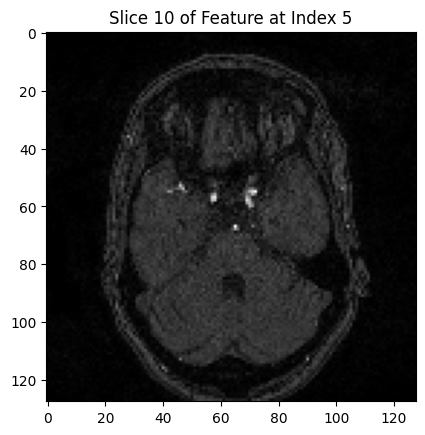

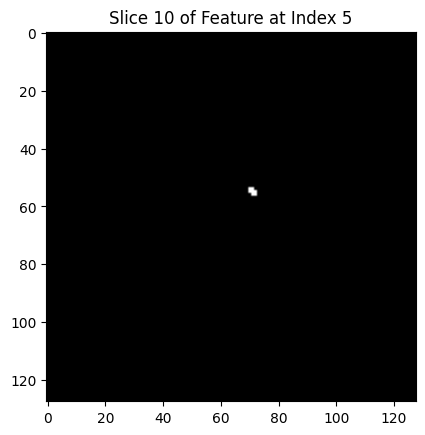

In [4]:
def visualize_feature_slice(dataset, index, slice_index):
    # Get feature and label tensors
    feature_tensor, label_tensor = dataset[index]

    print(feature_tensor.shape)
    print(label_tensor.shape)
    print(torch.unique(label_tensor))
    
    feature_tensor = torch.squeeze(feature_tensor)
    label_tensor = torch.squeeze(label_tensor)
    
    # Select the 2D slice at the specified index along the depth dimension
    slice_2d = feature_tensor[:, :, slice_index].numpy()

    # Plot the selected 2D slice
    plt.imshow(slice_2d, cmap='gray')
    plt.title(f"Slice {slice_index} of Feature at Index {index}")
    plt.show()
    
    # Select the 2D slice at the specified index along the depth dimension
    slice_2d = label_tensor[:, :, slice_index].numpy()

    # Plot the selected 2D slice
    plt.imshow(slice_2d, cmap='gray')
    plt.title(f"Slice {slice_index} of Feature at Index {index}")
    plt.show()


# Create the dataset object
feature_folder = 'ADAM_features/Baseline_Subjects'
label_folder = 'ADAM_labels_fixed/Baseline_Subjects'
dataset = CustomADAMDataset(feature_folder, label_folder)

# Visualize a specific 2D slice (e.g., slice index 32) from a specific sample (e.g., index 5)
index = 5
slice_index = 10
visualize_feature_slice(dataset, index, slice_index)


# ADAMDataModule

In [5]:
import torch
import torch.nn.functional as F
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch import nn, optim
from torch.utils.data import DataLoader
from torch.utils.data import random_split
import pytorch_lightning as pl



class ADAMDataModule(pl.LightningDataModule):
    def __init__(self, batch_size, num_workers,
                 train_feat_dir="ADAM_features/Baseline_Subjects",
                 train_label_dir="ADAM_labels_fixed/Baseline_Subjects",
                 val_feat_dir="ADAM_features/Followup_Subjects",
                 val_label_dir="ADAM_labels_fixed/Followup_Subjects",
                 test_feat_dir="ADAM_features/Unique_Subjects",
                 test_label_dir="ADAM_labels_fixed/Unique_Subjects"):
        super().__init__()
        self.batch_size = batch_size
        self.num_workers = num_workers
        
        self.train_feat_dir = train_feat_dir
        self.train_label_dir = train_label_dir
        self.val_feat_dir = val_feat_dir
        self.val_label_dir = val_label_dir
        self.test_feat_dir = test_feat_dir
        self.test_label_dir = test_label_dir

	# Called only within a single process on CPU
	# Prevents data corruption in distributed settings
    def prepare_data(self):
        pass
    
	# Data operations you might want to perform on every GPU
    def setup(self, stage):
        # Replace this with your normal dataset class
        self.train_ds = CustomADAMDataset(self.train_feat_dir, self.train_label_dir)
        self.val_ds = CustomADAMDataset(self.val_feat_dir, self.val_label_dir)
        self.test_ds = CustomADAMDataset(self.test_feat_dir, self.test_label_dir)

    def train_dataloader(self):
        return DataLoader(
            self.train_ds,
            batch_size=self.batch_size,
            num_workers=self.num_workers,
            shuffle=True,
        )

    def val_dataloader(self):
        return DataLoader(
            self.val_ds,
            batch_size=self.batch_size,
            num_workers=self.num_workers,
            shuffle=False,
        )

    def test_dataloader(self):
        return DataLoader(
            self.test_ds,
            batch_size=self.batch_size,
            num_workers=self.num_workers,
            shuffle=False,
        )


In [7]:
from monai.networks.nets import UNETR

IN_CHANNELS = 1
OUT_CHANNELS = 1
IMG_SIZE = (128, 128, 64)
FEATURE_SIZE = 16
HIDDEN_SIZE = 768
MLP_DIM = 3072
NUM_HEADS = 12
POS_EMBED = "perceptron"
NORM_NAME = "instance"
RES_BLOCK = True
DROPOUT_RATE = 0.0

class UNETRSegmentation(pl.LightningModule):
    def __init__(self, learning_rate=1e-3):
        super(UNETRSegmentation, self).__init__()
        self.model = UNETR(
            in_channels=IN_CHANNELS,
            out_channels=OUT_CHANNELS,
            img_size=IMG_SIZE,
            feature_size=FEATURE_SIZE,
            hidden_size=HIDDEN_SIZE,
            mlp_dim=MLP_DIM,
            num_heads=NUM_HEADS,
            pos_embed=POS_EMBED,
            norm_name=NORM_NAME,
            res_block=RES_BLOCK,
            dropout_rate=DROPOUT_RATE,
        )
        self.learning_rate = learning_rate
        # self.loss_fn = monai.losses.DiceCELoss(include_background=False, sigmoid=True)
        self.loss_fn = monai.losses.DiceFocalLoss(include_background=True, sigmoid=True)
        self.dice_metric = DiceMetric(
            include_background=False, reduction="mean")


    def forward(self, x):
        x = x.float()  # convert tensor to float precision
        return self.model(x)
    
    def _common_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self(x)
        y_hat_discrete = (torch.sigmoid(y_hat) > 0.5).float()
        loss = self.loss_fn(y_hat, y)
        self.dice_metric(y_hat_discrete, y)
        dice_score = self.dice_metric.aggregate().item()
        self.dice_metric.reset()
        return loss, dice_score, y_hat, y_hat_discrete


    def training_step(self, batch, batch_idx):
        loss, dice_score, y_hat, y_hat_discrete = self._common_step(batch, batch_idx)
        self.log('train_loss', loss)
        self.log('train_dice_score', dice_score)
        return loss

    def validation_step(self, batch, batch_idx):
        loss, dice_score, y_hat, y_hat_discrete = self._common_step(batch, batch_idx)
        self.log('val_loss', loss)
        self.log('val_dice_score', dice_score)

    def test_step(self, batch, batch_idx):
        loss, dice_score, y_hat, y_hat_discrete = self._common_step(batch, batch_idx)
        self.log('test_loss', loss)
        self.log('test_dice_score', dice_score)

    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.parameters(), lr=self.learning_rate)
        return optimizer


In [9]:

import torch
import pytorch_lightning as pl
from pytorch_lightning.loggers import TensorBoardLogger, CSVLogger
from pytorch_lightning.profilers import PyTorchProfiler
from pytorch_lightning.strategies import DeepSpeedStrategy
from monai.networks.nets import UNETR
import monai

BATCH_SIZE = 4       # Batch size for training
NUM_EPOCHS = 100        # Number of epochs for training

# Dataset settings
NUM_WORKERS = 0      # Number of workers for data loading

# Compute related settings
ACCELERATOR = "gpu"   # Accelerator type (e.g., "gpu" for GPU acceleration)
DEVICES = [0]         # List of device IDs for multi-GPU setup
PRECISION = 32        # Numerical precision (e.g., 16 for half-precision)
EXPERIMENT_NAME = "seg_model_untrained_baseline_v2"


In [10]:
from pytorch_lightning.callbacks import ModelCheckpoint
# saves a file like: my/path/sample-mnist-epoch=02-val_loss=0.32.ckpt
checkpoint_callback = ModelCheckpoint(
    monitor='val_loss',
    dirpath='seg_checkpoints/',
    save_top_k=3,
    mode='min',
)


In [8]:



device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
csv_logger = CSVLogger("logs", name=EXPERIMENT_NAME)
tb_logger = TensorBoardLogger("logs", name=EXPERIMENT_NAME)
# strategy = DeepSpeedStrategy()  # Multi-GPU training Strategy
profiler = PyTorchProfiler(  # Helps logs useful information for debugging (memory consumption etc.)
    on_trace_ready=torch.profiler.tensorboard_trace_handler(
        "logs/profiler0"),
    schedule=torch.profiler.schedule(
        skip_first=10, wait=3, warmup=2, active=5),
)
model = UNETRSegmentation(learning_rate=1e-3)

dm = ADAMDataModule(
    batch_size=BATCH_SIZE,
    num_workers=NUM_WORKERS,
)
trainer = pl.Trainer(
    # profiler=profiler,
    logger=[csv_logger, tb_logger],
    accelerator=ACCELERATOR,
    devices=DEVICES,
    min_epochs=1,
    max_epochs=NUM_EPOCHS,
    precision=PRECISION,
    log_every_n_steps=3,
    callbacks=[checkpoint_callback],
    # fast_dev_run = True
    # callbacks=[MyPrintingCallback(), EarlyStopping(monitor="val_loss")],
)
# Runs train loops and performs validation at end of each train epoch
trainer.fit(model, dm)
# Runs a final validation run with trained model
trainer.validate(model, dm)
# Runs test run with trained model
trainer.test(model, dm)


2023-08-10 16:26:53,549 - GPU available: True (cuda), used: True
2023-08-10 16:26:53,550 - TPU available: False, using: 0 TPU cores
2023-08-10 16:26:53,551 - IPU available: False, using: 0 IPUs
2023-08-10 16:26:53,551 - HPU available: False, using: 0 HPUs
2023-08-10 16:26:57,839 - LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
2023-08-10 16:26:57,844 - 
  | Name    | Type          | Params
------------------------------------------
0 | model   | UNETR         | 92.8 M
1 | loss_fn | DiceFocalLoss | 0     
------------------------------------------
92.8 M    Trainable params
0         Non-trainable params
92.8 M    Total params
371.258   Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

/home/incomple_/anaconda3/envs/ulip/lib/python3.7/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:229: PossibleUserWarning: The dataloader, val_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  category=PossibleUserWarning,
/home/incomple_/anaconda3/envs/ulip/lib/python3.7/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:229: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  category=PossibleUserWarning,


Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

2023-08-10 19:57:57,184 - `Trainer.fit` stopped: `max_epochs=100` reached.
2023-08-10 19:57:58,069 - LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


/home/incomple_/anaconda3/envs/ulip/lib/python3.7/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:229: PossibleUserWarning: The dataloader, val_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  category=PossibleUserWarning,


Validation: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     Validate metric           DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     val_dice_score        0.001988707110285759
        val_loss            1.0055378675460815
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
2023-08-10 19:59:02,629 - LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


/home/incomple_/anaconda3/envs/ulip/lib/python3.7/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:229: PossibleUserWarning: The dataloader, test_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  category=PossibleUserWarning,


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     test_dice_score        0.02675100602209568
        test_loss            0.995067834854126
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


[{'test_loss': 0.995067834854126, 'test_dice_score': 0.02675100602209568}]

In [11]:
CHECKPOINT_PATH = "logs/seg_model_untrained_baseline_v2/version_1/checkpoints/epoch=99-step=900.ckpt"
NEW_NUM_EPOCHS = 200  # Resuming training for another 100 epochs, total of 200

# ... (rest of the code remains the same)

trainer = pl.Trainer(
    # profiler=profiler,
    logger=logger,
    accelerator=ACCELERATOR,
    devices=DEVICES,
    min_epochs=1,
    max_epochs=NEW_NUM_EPOCHS,
    precision=PRECISION,
    log_every_n_steps=3,
    # Resuming training from the checkpoint
    resume_from_checkpoint=CHECKPOINT_PATH,
    callbacks=[checkpoint_callback],
    # fast_dev_run = True
    # callbacks=[MyPrintingCallback(), EarlyStopping(monitor="val_loss")],
)

# Runs train loops and performs validation at end of each train epoch
trainer.fit(model, dm)
# Runs a final validation run with trained model
trainer.validate(model, dm)
# Runs test run with trained model
trainer.test(model, dm)


2023-08-10 20:30:37,909 - GPU available: True (cuda), used: True
2023-08-10 20:30:37,910 - TPU available: False, using: 0 TPU cores
2023-08-10 20:30:37,911 - IPU available: False, using: 0 IPUs
2023-08-10 20:30:37,911 - HPU available: False, using: 0 HPUs
2023-08-10 20:30:37,915 - Restoring states from the checkpoint path at logs/seg_model_untrained_baseline_v2/version_1/checkpoints/epoch=99-step=900.ckpt


/home/incomple_/anaconda3/envs/ulip/lib/python3.7/site-packages/pytorch_lightning/trainer/connectors/checkpoint_connector.py:56: LightningDeprecationWarning: Setting `Trainer(resume_from_checkpoint=)` is deprecated in v1.5 and will be removed in v2.0. Please pass `Trainer.fit(ckpt_path=)` directly instead.
  "Setting `Trainer(resume_from_checkpoint=)` is deprecated in v1.5 and"
/home/incomple_/anaconda3/envs/ulip/lib/python3.7/site-packages/pytorch_lightning/trainer/trainer.py:1909: LightningDeprecationWarning: `trainer.resume_from_checkpoint` is deprecated in v1.5 and will be removed in v2.0. Specify the fit checkpoint path with `trainer.fit(ckpt_path=)` instead.
  stacklevel=5,
/home/incomple_/anaconda3/envs/ulip/lib/python3.7/site-packages/pytorch_lightning/trainer/trainer.py:1453: UserWarning: Be aware that when using `ckpt_path`, callbacks used to create the checkpoint need to be provided during `Trainer` instantiation. Please add the following callbacks: ["ModelCheckpoint{'monito

2023-08-10 20:30:40,527 - LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
2023-08-10 20:30:40,544 - 
  | Name    | Type          | Params
------------------------------------------
0 | model   | UNETR         | 92.8 M
1 | loss_fn | DiceFocalLoss | 0     
------------------------------------------
92.8 M    Trainable params
0         Non-trainable params
92.8 M    Total params
371.258   Total estimated model params size (MB)
2023-08-10 20:30:41,412 - Restored all states from the checkpoint file at logs/seg_model_untrained_baseline_v2/version_1/checkpoints/epoch=99-step=900.ckpt


Sanity Checking: 0it [00:00, ?it/s]

/home/incomple_/anaconda3/envs/ulip/lib/python3.7/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:229: PossibleUserWarning: The dataloader, val_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  category=PossibleUserWarning,
/home/incomple_/anaconda3/envs/ulip/lib/python3.7/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:229: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  category=PossibleUserWarning,


Training: 9it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

2023-08-10 23:44:37,893 - `Trainer.fit` stopped: `max_epochs=200` reached.
2023-08-10 23:44:38,826 - LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


/home/incomple_/anaconda3/envs/ulip/lib/python3.7/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:229: PossibleUserWarning: The dataloader, val_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  category=PossibleUserWarning,


Validation: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     Validate metric           DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     val_dice_score        0.013893558643758297
        val_loss            1.0055769681930542
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
2023-08-10 23:45:40,429 - LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


/home/incomple_/anaconda3/envs/ulip/lib/python3.7/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:229: PossibleUserWarning: The dataloader, test_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  category=PossibleUserWarning,


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     test_dice_score                0.0
        test_loss           1.0077022314071655
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


[{'test_loss': 1.0077022314071655, 'test_dice_score': 0.0}]

: 